# K-means clustering

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import cluster

### 1. Use 'Customer.csv'. Standardize the variables.

In [2]:
df = pd.read_csv('Customer.csv')
df.head()

,income,age
0,101743,58
1,49597,27
2,36517,52
3,33223,49
4,72994,53


- `df = pd.read_csv('Customer.csv')`: This line uses Pandas to read 'Customer.csv' and store its data into a DataFrame df.
- `df.head()`: This line displays the first five rows of df for a quick data preview.

In [3]:
# Standardize: Method 2

df['z_income'] = preprocessing.scale(df.income)
df['z_age'] = preprocessing.scale(df.age)
df.head()

,income,age,z_income,z_age
0,101743,58,0.551088,1.694418
1,49597,27,-0.777720,-1.131131
2,36517,52,-1.111030,1.147537
3,33223,49,-1.194969,0.874097
4,72994,53,-0.181507,1.238684


- `preprocessing.scale(df.income)`: Standardizes the 'income' column.

### 2. Inspect the data visually for any clustering.

Text(0, 0.5, 'Age')

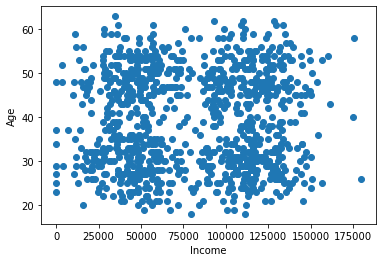

In [4]:
plt.scatter(df.income, df.age)
plt.xlabel('Income')
plt.ylabel('Age')

- `plt.scatter(df.income, df.age)`: This line creates a scatter plot using the values in the 'income' column for the x-axis and the 'age' column for the y-axis. Each point on the plot represents a single data entry from the DataFrame df.
- `plt.xlabel('Income') and plt.ylabel('Age')`: These lines add labels to the x-axis and y-axis of the plot, respectively. 

### 3. Conduct a 4-cluster k-means clustering analysis using the standardized variables. Add 'cluster' to the data

In [5]:
m = cluster.KMeans(n_clusters=4, random_state=10).fit(df[['z_income', 'z_age']])
df['cluster'] = m.labels_
df.head()

,income,age,z_income,z_age,cluster
0,101743,58,0.551088,1.694418,1
1,49597,27,-0.777720,-1.131131,0
2,36517,52,-1.111030,1.147537,3
3,33223,49,-1.194969,0.874097,3
4,72994,53,-0.181507,1.238684,3


- `m = cluster.KMeans(n_clusters=4, random_state=10).fit(df[['z1_income', 'z1_age']])`: This line initializes a k-means clustering process with 4 clusters (n_clusters=4) and a random state of 10 for reproducibility.
It fits the model to the data points represented by the standardized 'income' and 'age' columns in the DataFrame df.
- `df['cluster'] = m.labels_`: After the model fitting, each data point is assigned a cluster label (from 0 to 3, since there are four clusters).

### 4. What are the number of samples in each cluster?

In [6]:
df.groupby('cluster').count()

,income,age,z_income,z_age
cluster,,,,
0,248,248,248,248
1,238,238,238,238
2,258,258,258,258
3,256,256,256,256


- `df.groupby('cluster')`: This groups the DataFrame based on unique values in the 'cluster' column. Each unique value represents a different cluster.
- `count()`: This function counts the number of rows in each group (i.e., each cluster). The count is done for each column, but since all columns are present for each row, the count will be the same across all columns.

### 5. Graph the four clusters with different colors.

Text(0, 0.5, 'Age')

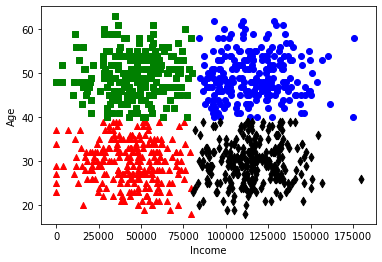

In [7]:
colors = ['r', 'b', 'k', 'g']  # red, blue, black, green
markers = ['^', 'o', 'd', 's']
for c in df.cluster.unique(): # c=0~3 (unique cluster values)
    d = df[df.cluster == c]   # data for each cluster 0~3
    plt.scatter(d.income, d.age, marker=markers[c], color=colors[c])  # different color for each of four clusters
plt.xlabel('Income')
plt.ylabel('Age')

- `colors and markers` are lists that define the colors and marker styles that will be used for the different clusters in the scatter plot.
- `for c in df.cluster.unique()`: This loop iterates over each unique value in the 'cluster' column, representing different clusters.
- `d = df[df.cluster == c]`: For each cluster, this line filters the main DataFrame to contain only the rows belonging to the current cluster.
- `plt.scatter(d.income, d.age, marker=markers[c], color=colors[c])`: This plots the 'income' and 'age' of the filtered data d with a specific marker and color for the current cluster.Each cluster will be represented with a different color and marker style on the scatter plot, making them distinguishable.
- `plt.xlabel('Income') and plt.ylabel('Age')`: These lines set the labels for the x-axis and y-axis, respectively.

### 6. Calculate the mean of each variable in each cluster

In [8]:
# # Method 1

df.groupby('cluster').mean()  # Mean of each cluster for all columns
# df.groupby('cluster')[['income', 'age']].mean()

,income,age,z_income,z_age
cluster,,,,
0,43699.213710,29.625000,-0.928010,-0.891871
1,116199.844538,49.399160,0.919484,0.910479
2,115210.709302,29.748062,0.894278,-0.880654
3,46482.371094,49.339844,-0.857088,0.905073


- `df.groupby('cluster').mean()`: This command groups the DataFrame by the 'cluster' column and calculates the mean (average) for each group (i.e., each cluster) across all columns. The result is a new DataFrame showing the average values of all features for each cluster.

In [9]:
# Method 2

m.cluster_centers_  # mean of standardized value

array([[-0.92800966, -0.89187067],
       [ 0.9194838 ,  0.91047915],
       [ 0.89427821, -0.88065397],
       [-0.857088  ,  0.9050727 ]])

- `m.cluster_centers_`: This attribute holds the coordinates of the cluster centers (centroids) from the fitted k-means model m. These coordinates are in the space of the standardized variables (since the model was trained on standardized data) and represent the average (mean) values of the data points within each cluster.

### 7. Display the samples in cluster=1

In [10]:
df.loc[df.cluster==1] 
df[df.cluster==1]  # '.loc' can be omitted

,income,age,z_income,z_age,cluster
0,101743,58,0.551088,1.694418,1
13,117177,55,0.944384,1.420977,1
14,134379,48,1.382733,0.782950,1
22,89332,50,0.234825,0.965244,1
23,111413,60,0.797503,1.876711,1
...,...,...,...,...,...
990,127550,52,1.208714,1.147537,1
991,95327,46,0.387593,0.600657,1
992,92675,55,0.320013,1.420977,1
996,95102,41,0.381859,0.144923,1


- `df.loc[df.cluster==1]`: This command uses the .loc accessor for selection, combined with a boolean condition (df.cluster==1) to filter the rows. It selects all rows where the 'cluster' column value is 1.

### Calcuate the Euclidean distance between first and second person

In [11]:
print(2*3)  # multiplication
print(2**3)  # exponentiation

6
8


In [12]:
# Age and income of 3 people

age = [50, 40, 30]
income = [50000, 40000, 30000]

- `age = [50, 40, 30]`: This line creates a list called age containing the ages of three individuals.
- `income = [50000, 40000, 30000]`: This line creates a list called income that stores the income of the same three individuals, assuming the order of income corresponds to the order of ages in the age list.

In [13]:
# Euclidean distance

math.sqrt((age[0] - age[1])**2 + (income[0] - income[1])**2)

10000.00499999875

- `(age[0] - age[1])**2`: Computes the difference in ages between the first and second individuals.
- `(income[0] - income[1])**2`: Calculates the squared difference in incomes between the first and second individuals.
- `math.sqrt()`: The square root of the sum is taken, resulting in the Euclidean distance.

### Standardize the variables.

In [14]:
# Standardize: method 1

df['z1_income'] = (df.income - df.income.mean())/df.income.std()
df['z1_age'] = (df.age - df.age.mean())/df.age.std()
df.head()

,income,age,z_income,z_age,cluster,z1_income,z1_age
0,101743,58,0.551088,1.694418,1,0.550812,1.693570
1,49597,27,-0.777720,-1.131131,0,-0.777331,-1.130565
2,36517,52,-1.111030,1.147537,3,-1.110474,1.146963
3,33223,49,-1.194969,0.874097,3,-1.194372,0.873660
4,72994,53,-0.181507,1.238684,3,-0.181416,1.238064


- `df.income.mean()`: Computes the average income across all rows in the 'income' column.
- `df.income.std()`: Calculates the standard deviation of income across all rows in the 'income' column. This measures the amount of variation from the average.
- `df['z1_income'] = (df.income - df.income.mean())/df.income.std()`: Creates a new column 'z1_income' with the standardized value (z-score) of the 'income' column.
    - The z-score normalizes the data points in terms of their distance from the mean, measured in standard deviations.

In [15]:
# Standardize: Method 2

col = ['income', 'age']  # df.columns: for all columns
for c in col:
    df['z2_'+c]=preprocessing.scale(df[c])
df.head()

,income,age,z_income,z_age,cluster,z1_income,z1_age,z2_income,z2_age
0,101743,58,0.551088,1.694418,1,0.550812,1.693570,0.551088,1.694418
1,49597,27,-0.777720,-1.131131,0,-0.777331,-1.130565,-0.777720,-1.131131
2,36517,52,-1.111030,1.147537,3,-1.110474,1.146963,-1.111030,1.147537
3,33223,49,-1.194969,0.874097,3,-1.194372,0.873660,-1.194969,0.874097
4,72994,53,-0.181507,1.238684,3,-0.181416,1.238064,-0.181507,1.238684


- `col = ['income', 'age']`: Defines a list of column names that the script will process.
- `for c in col` Starts a loop that iterates over each item in the col list.
- `df['z3_'+c] = preprocessing.scale(df[c])`: Within the loop, for each column name in col, standardize the corresponding data using the preprocessing.scale function. Create a new column in df with a name combining 'z3_' and the original column name (stored in c), containing the standardized values.

### Calculate the mean of each variable in each cluster

In [16]:
for c in df.cluster.unique():
    print("Cluster: ", c)
    for col in ['income', 'age']:
        print(col + ": {:.2f}".format(df.loc[df.cluster==c, col].mean()))
        # print(col + ": " + str(df.loc[df.cluster==c, col].mean()))  # alternative

Cluster:  1
income: 116199.84
age: 49.40
Cluster:  0
income: 43699.21
age: 29.62
Cluster:  3
income: 46482.37
age: 49.34
Cluster:  2
income: 115210.71
age: 29.75


- `for c in df.cluster.unique()`: Iterates over each unique cluster identifier in the 'cluster' column.
- `print("Cluster: ", c)`: Prints the current cluster number.
- `for col in ['income', 'age']`: Iterates over the two specified columns, 'income' and 'age'.
- `df.loc[df.cluster==c, col].mean()`: For the current cluster and column, this line calculates the average value. It uses: .loc[] to filter rows where the 'cluster' column equals the current cluster (identified by c) and select the current column (identified by col).
- `mean()` calculates the average of the selected rows and column.
- `{:.2f}".format(...)`: This constructs a string with the column name and its average value, formatted to have two decimal places (indicated by .2f).
    - 2f: 2 digit after decimal point, floating point
    - loc: Access data by label
    - iloc: Access data by index